<a href="https://colab.research.google.com/github/Mogreine29/HandsOnAI_2/blob/main/DataVisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librairies

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mount le drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/Challenge2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Challenge2


Lecture de data

In [ ]:
df_train = pd.read_csv('fake_train.csv')
df_test = pd.read_csv('fake_test.csv')
#See what the data looks like
df_train.head()

,Unnamed: 0,data,label,target_name
0,0,Au 22e jour consécutif de la grève reconductib...,0,News
1,1,"Depuis plusieurs mois, les initiatives des che...",0,News
2,2,Google vient d'introduire une mise à jour de...,0,News
3,3,Portrait. Chacun s’empresse autour d’elle tan...,0,News
4,4,« Il n’y a pas de risque de pénurie » de carbu...,0,News


Données parasites
-	1136 : suite du mot ISLAM.
-	1180 : data en arabe
-	1317 : pas de data.
-	1362 : suite du mot ROUEN.
-	1429 : suite de 1 et 0. Ces nombres ont été supprimé par notre cleaner(text). 

In [ ]:
df_train.drop([1136, 1180, 1317, 1362, 1429], inplace = True )

Recherche de null et vide dans le data

In [ ]:
df_train.isna().sum()

Unnamed: 0     0
data           0
label          0
target_name    0
dtype: int64

Jeu de données en équilibre ou non

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


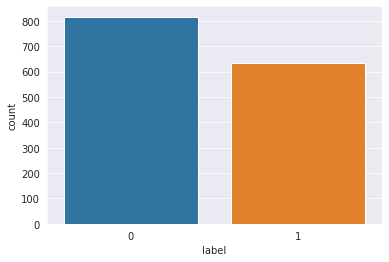

In [ ]:

sns.set_style("darkgrid")
sns.countplot(df_train.label)

Retirer les colonnes inutiles

In [ ]:
df_train = df_train.drop(['Unnamed: 0', 'target_name'], axis = 1)
df_test = df_test.drop(['Unnamed: 0', 'target_name'], axis = 1)

df_train.head()

,data,label
0,Au 22e jour consécutif de la grève reconductib...,0
1,"Depuis plusieurs mois, les initiatives des che...",0
2,Google vient d'introduire une mise à jour de...,0
3,Portrait. Chacun s’empresse autour d’elle tan...,0
4,« Il n’y a pas de risque de pénurie » de carbu...,0


Ajout de nouvelles data

In [ ]:
#Ne pas exécuter cette céllule pour ne pas avoir les nouvelles données et avoir les résultats présentés dans le rapport

df_real = pd.read_csv("real_news.csv")
df_fake = pd.read_csv("fake_news.csv")
df_real = df_real.drop(['site', 'url', 'title'], axis = 1)
df_fake = df_fake.drop(['site', 'url', 'title'], axis = 1)
df_real['label'] = 0
df_fake['label'] = 1
df_real.rename(columns = {'text':'data'}, inplace = True)
df_fake.rename(columns = {'text':'data'}, inplace = True)
df_train = df_train.append(df_real, ignore_index = True)
df_train = df_train.append(df_fake, ignore_index = True)

df_train['data'] = df_train['data'].astype(str)
df_test['data'] = df_test['data'].astype(str)

Vérification d'équilibre. Nous avons un peu plus de real news que fake

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


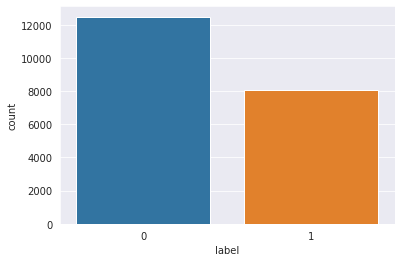

In [ ]:

sns.set_style("darkgrid")
sns.countplot(df_train.label)

Nettoyer le texte en retirant les caractères et mots inutiles

In [ ]:
STOPWORDS = set(stopwords.words('french'))
moreStopwords = ['plus', 'comme', 'a', 'il', 'alors','au',
'aucuns','aussi','autre','avant','avec','avoir','bon','car','ce','cela','ces','ceux','chaque','ci',
'comme','comment','dans','des','du','dedans','dehors','depuis','devrait','doit','donc','dos','début',
'elle','elles','en','encore','essai','est','et','eu','fait','faites','fois','font','hors','ici','il',
'ils','je',	'juste','la','le','les','leur','là','ma','maintenant','mais','mes','mien','moins','mon',
'mot','même','ni','nommés','notre','nous','ou','où','par','parce','pas','peut','peu','plupart','pour',
'pourquoi','quand','que','quel','quelle','quelles','quels','qui','sa','sans','ses','seulement','si',
'sien','son','sont','sous','soyez',	'sujet','sur','ta','tandis','tellement','tels','tes','ton','tous',
'tout','trop','très','tu','voient','vont','votre','vous','vu','ça','étaient','état','étions','été','être',
'cette','celle','dont','celui', 'adsbygoogle','window','secretnews','leurs','ainsi','toute','déjà','autres',
'suivre','facebook','twitter','parodique', 'média','collaboratif', 'libre','notamment',
'mercilesentreprisesgiletsjaunes',
'entreprisesgiletsjaunes',
'dontforgetyourmariage']

STOPWORDS.update(moreStopwords)
def cleaner(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    text = ' '.join(word for word in text.split() if word not in STOPWORDS)   
    return text

In [ ]:
df_train['data'] = df_train['data'].apply(cleaner)
df_test['data'] = df_test['data'].apply(cleaner)

WordCloud pour voir les mots les plus importants dans les deux types de textes

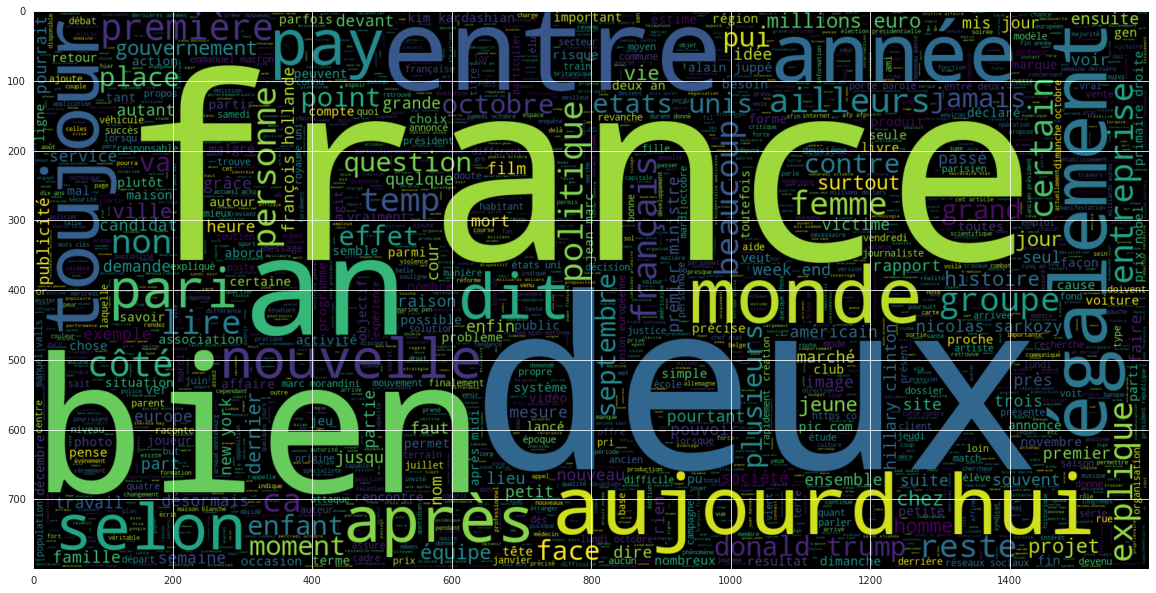

In [ ]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df_train[df_train.label == 0].data))
plt.imshow(wc , interpolation = 'bilinear')

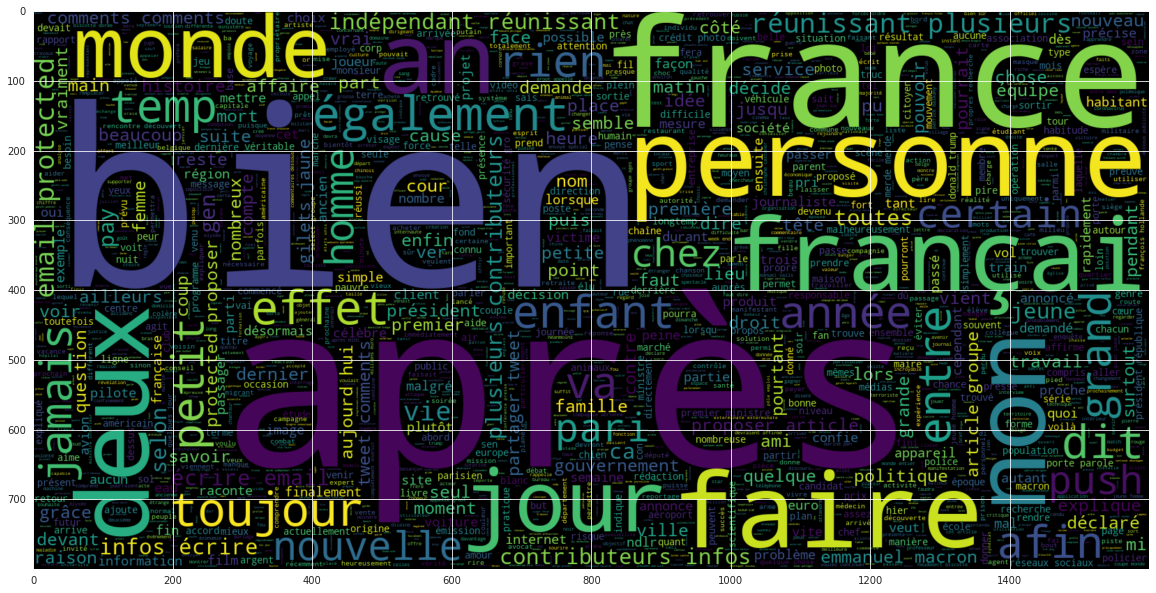

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df_train[df_train.label == 1].data))
plt.imshow(wc , interpolation = 'bilinear')

Nombre de caractères dans chaque type de texte

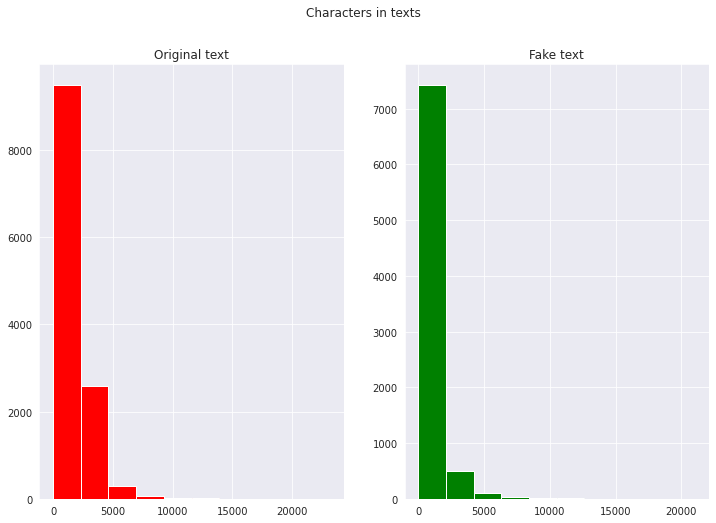

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df_train[df_train['label']==0]['data'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df_train[df_train['label']==1]['data'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

Nombre de mots dans chaque type de texte

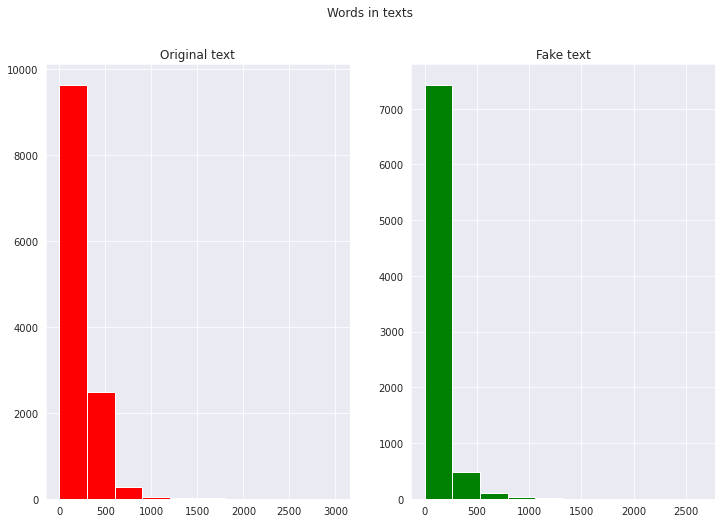

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df_train[df_train['label']==0]['data'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df_train[df_train['label']==1]['data'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

Moyenne de la longueur des mots

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.

Text(0.5, 0.98, 'Average word length in each text')

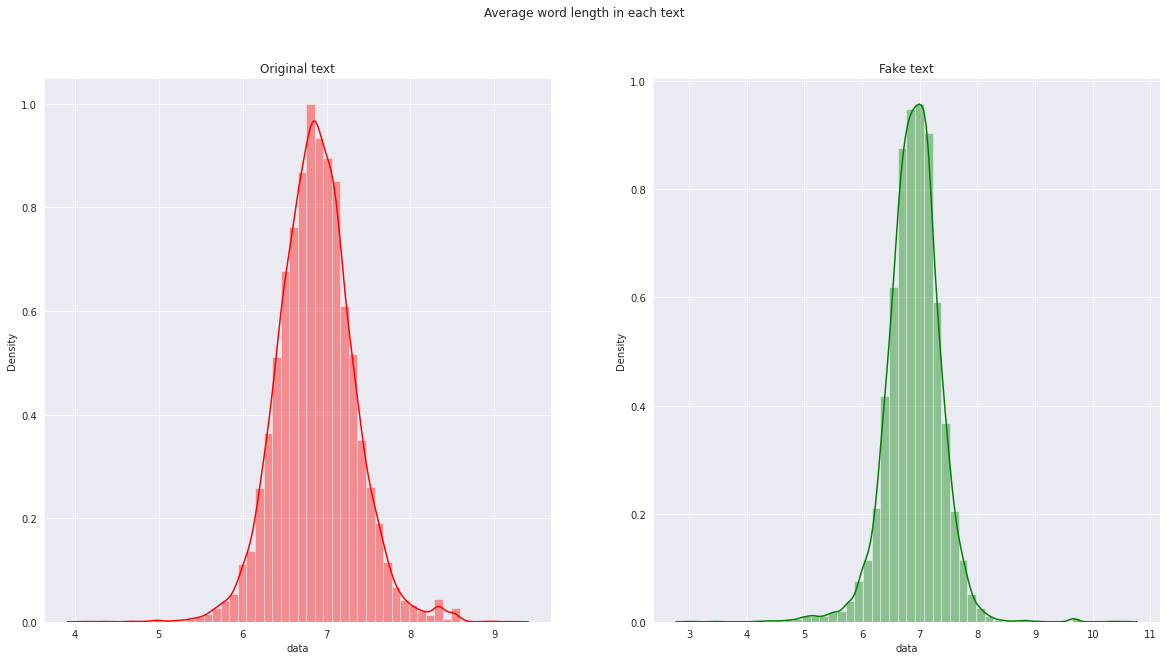

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df_train[df_train['label']==0]['data'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df_train[df_train['label']==1]['data'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

Les mots les plus longs dans les fakes textes

In [ ]:
mots = df_train[df_train['label']==1]['data'].str.split()
maxlen=''
for i in mots:
  for j in i:
    if len(j)>len(maxlen):
      maxlen = j
      print(i)
      print(j)

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df_train.data)

Les mots les plus fréquents

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'après': 14701,
 'deux': 13422,
 'faire': 12582,
 'ans': 12171,
 'france': 11758,
 'bien': 11589,
 'octobre': 9189,
 'entre': 9093,
 'contre': 8660,
 'selon': 8087}

Fonction pour calculer les n-grammes 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Graphique des mots les plus fréquents (unigrammes)

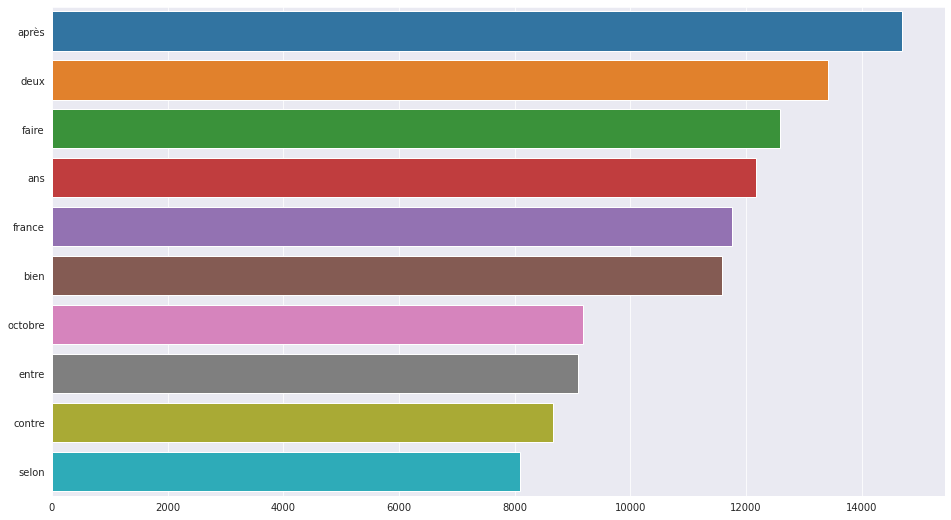

In [ ]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df_train.data,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

Graphiques des bigrammes les plus fréquents

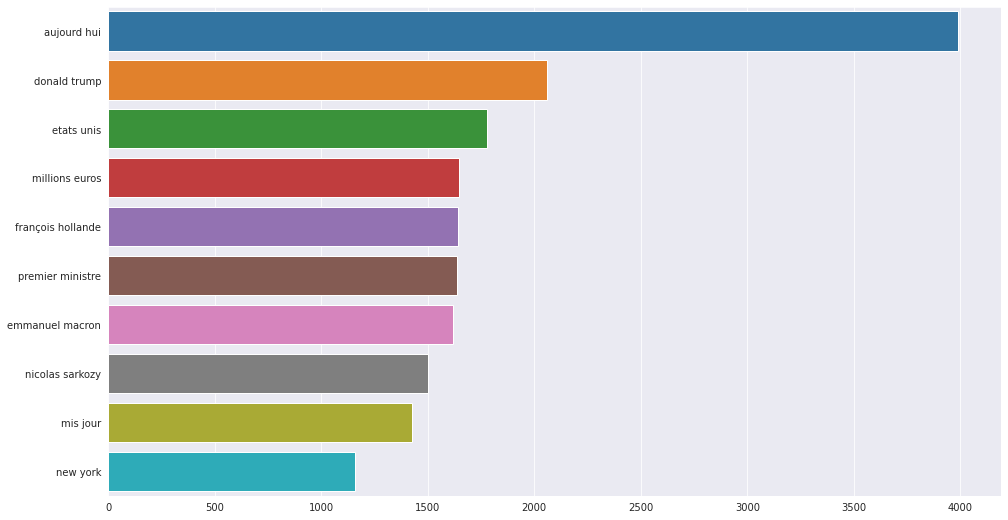

In [ ]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df_train.data,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))